In [1]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("Datos_split/koi_light_curves_train.csv",header=None) #koi_light_curves
df_val = pd.read_csv("Datos_split/koi_light_curves_val.csv",header=None) #koi_light_curves
df_test = pd.read_csv("Datos_split/koi_light_curves_test.csv",header=None) #koi_light_curves

In [6]:
#Verificar que metadata tenga period en la misma forma

metadata_train = pd.read_csv("OwnFats/koi_light_curves_FATS_metadata_train.csv",header=None) #koi_light_curves
metadata_val = pd.read_csv("OwnFats/koi_light_curves_FATS_metadata_val.csv",header=None) #koi_light_curves
metadata_test = pd.read_csv("OwnFats/koi_light_curves_FATS_metadata_test.csv",header=None) #koi_light_curves

In [12]:
metadata_train.iloc[:,10]

0         8.884923
1         5.092465
2       275.073650
3         0.539366
4        36.267167
5       161.788327
6         9.931463
7         1.592633
8         3.003180
9        21.853629
10       13.060794
11       86.723653
12      569.934135
13        1.975209
14        6.126012
15       40.806533
16      140.107650
17        3.290304
18      462.120690
19       77.362415
20        3.025585
21      317.745270
22        3.435251
23        2.325400
24        0.764598
25        6.496769
26        7.811540
27      116.521432
28       13.323541
29        2.283466
           ...    
4014      0.608075
4015      7.467190
4016     14.180228
4017     12.913859
4018     14.667695
4019      8.207258
4020      8.472379
4021      1.902209
4022      5.093939
4023      3.432737
4024      1.227751
4025      0.888478
4026    655.257320
4027      0.653554
4028     21.300205
4029      8.047277
4030     44.145798
4031     44.145990
4032     41.077590
4033     41.077297
4034    462.463589
4035      6.

In [94]:
metadata_train.iloc[:,10][1922]

1064.2680955999999

In [103]:
import math
math.ceil(71000/(1064.2680955999999*54))

2

Periodo:  8.884922995


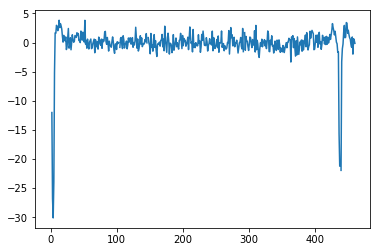

In [81]:
print("Periodo: ",metadata_train.iloc[:,10][0])
plt.plot(df_train.values[0,140:140+462])
plt.show()

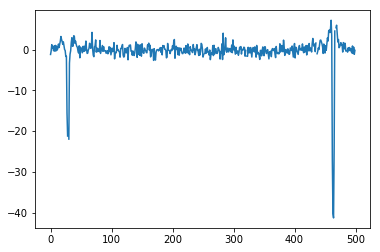

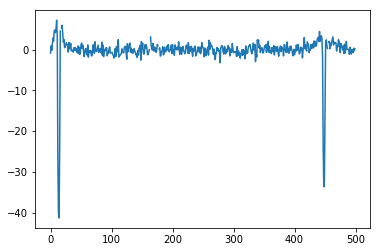

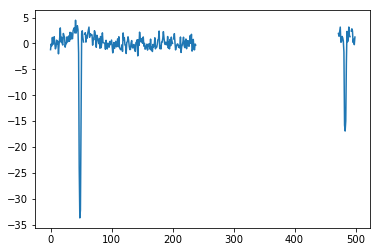

In [37]:
plt.plot(df_train.values[0,550:1050])
plt.show()
plt.plot(df_train.values[0,1000:1500])
plt.show()
plt.plot(df_train.values[0,1400:1900])
plt.show()

In [39]:
480/9

53.333333333333336

Periodo:  161.78832712


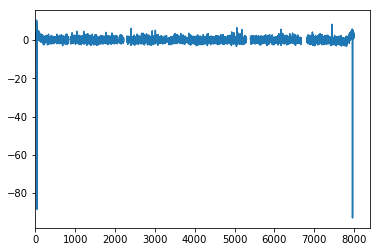

In [74]:
import matplotlib.pyplot as plt
print("Periodo: ",metadata_train.iloc[:,10][5])
plt.plot(df_train.values[5,4000:12000])
plt.xlim(0)
plt.show()

In [76]:
8000/162

49.382716049382715

In [78]:
 8.884922995*52

462.01599574

In [ ]:
52-54

### Cantidad de ceros

In [2]:
nan_values = []
for secuencia in df_train.values:
    nan_values.append(np.sum(np.isnan(secuencia)))
for secuencia in df_val.values:
    nan_values.append(np.sum(np.isnan(secuencia)))
for secuencia in df_test.values:
    nan_values.append(np.sum(np.isnan(secuencia)))      
print("Cantidad de nans por secuencia",np.mean(nan_values))
print("Porcentaje de nans por secuencia",np.mean(nan_values)/len(secuencia))

Cantidad de nans por secuencia 16417.8890842
Porcentaje de nans por secuencia 0.229855504


## Estadisticos total

In [12]:
df_train = pd.read_csv('OwnFats/koi_light_curves_FATS_resampled_train.csv',header=None)
#df_algo_val = pd.read_csv('OwnFats/koi_light_curves_FATS_resampled_val.csv',header=None)
#df_algo_test = pd.read_csv('OwnFats/koi_light_curves_FATS_resampled_test.csv',header=None)

In [13]:
minimo = np.min(df_train.iloc[:,0])
maximo = np.max(df_train.iloc[:,1])

print("Valor minimo: ",minimo)
print("Valor maximo:" ,maximo)

Valor minimo:  -251832.0
Valor maximo: 97755.3


### Estadísticos por ventana

In [104]:
from scipy.stats import skew
#TRAINING
X_train = np.nan_to_num(df_train.values)
X_val = np.nan_to_num(df_val.values)
X_test = np.nan_to_num(df_test.values)

window_size=150
strideg = 100

new_X_train = []
for sequence in X_train:
    new_array = []
    largo = int(len(sequence)/strideg)
    for i in range(largo):
        stride = i*strideg
        window = sequence[stride:stride+window_size]
    
        #estadisticas de la ventana
        new_array.append([np.max(window),np.min(window),np.mean(window),np.std(window),skew(window)])
    new_array = np.asarray(new_array)
    new_X_train.append(new_array)
new_X_train = np.asarray(new_X_train)
to_save = np.reshape(new_X_train,(new_X_train.shape[0],new_X_train.shape[1]*new_X_train.shape[2]))
np.savetxt("koi_light_curves_statistic3_train.csv", to_save, fmt='%.3f', delimiter=',')


new_X_val = []
for sequence in X_val:
    new_array = []
    largo = int(len(sequence)/strideg)
    for i in range(largo):
        stride = i*strideg
        window = sequence[stride:stride+window_size]
    
        #estadisticas de la ventana
        new_array.append([np.max(window),np.min(window),np.mean(window),np.std(window),skew(window)])
        
        #quizas agregar mediana?
        
    new_array = np.asarray(new_array)
    new_X_val.append(new_array)
new_X_val = np.asarray(new_X_val)
to_save = np.reshape(new_X_val,(new_X_val.shape[0],new_X_val.shape[1]*new_X_val.shape[2]))
np.savetxt("koi_light_curves_statistic3_val.csv", to_save, fmt='%.3f', delimiter=',')


new_X_test = []
for sequence in X_test:
    new_array = []
    largo = int(len(sequence)/strideg)
    for i in range(largo):
        stride = i*strideg
        window = sequence[stride:stride+window_size]
    
        #estadisticas de la ventana
        new_array.append([np.max(window),np.min(window),np.mean(window),np.std(window),skew(window)])
    new_array = np.asarray(new_array)
    new_X_test.append(new_array)
new_X_test = np.asarray(new_X_test)
to_save = np.reshape(new_X_test,(new_X_test.shape[0],new_X_test.shape[1]*new_X_test.shape[2]))
np.savetxt("koi_light_curves_statistic3_test.csv", to_save, fmt='%.3f', delimiter=',')

print(to_save.shape)

A revisar esto


NameError: name 'X_val' is not defined

### a los ultimos 2 periodos

In [147]:
import math
X_train = np.nan_to_num(df_train.values)
X_val = np.nan_to_num(df_val.values)
X_test = np.nan_to_num(df_test.values)

## 5 Valores en la ultima ventana
aux_X_train = []
for sequence,period in zip(X_train,metadata_train.iloc[:,10].values):
    window_size=strideg = int(period*54) # o 52 entre 50 y 55
    new_array = []
    largo = math.ceil(len(sequence)/strideg)
    for i in range(largo):
        stride = i*strideg
        window = sequence[stride:stride+window_size]
    
        new_array.append(window)
    new_array = np.asarray(new_array)
    aux_X_train.append(new_array)
aux_X_train = np.asarray(aux_X_train)

#Achicar a los ultimos 2 periodos
twoperiods_X_train = []
for arreglo in aux_X_train:
    new_seq = np.concatenate(arreglo[-2:],axis=0)
    largo = math.ceil(len(new_seq)/5)
    new_array = []
    for i in range(5):
        aux = largo*i
        window = new_seq[aux:aux+largo*(i+1)]
        #estadisticas de la ventana
        new_array.append([np.max(window),np.min(window),np.mean(window),np.std(window),skew(window)])
    new_array = np.asarray(new_array)
    twoperiods_X_train.append(new_array)
twoperiods_X_train = np.asarray(twoperiods_X_train)
to_save = np.reshape(twoperiods_X_train,(twoperiods_X_train.shape[0],twoperiods_X_train.shape[1]*twoperiods_X_train.shape[2]))
np.savetxt("koi_light_curves_statistic_period_train.csv", to_save, fmt='%.3f', delimiter=',')

## 5 Valores en la ultima ventana
aux_X_val = []
for sequence,period in zip(X_val,metadata_val.iloc[:,10].values):
    window_size=strideg = int(period*54) # o 52 entre 50 y 55
    new_array = []
    largo = math.ceil(len(sequence)/strideg)
    for i in range(largo):
        stride = i*strideg
        window = sequence[stride:stride+window_size]
    
        new_array.append(window)
    new_array = np.asarray(new_array)
    aux_X_val.append(new_array)
aux_X_val = np.asarray(aux_X_val)

#Achicar a los ultimos 2 periodos
twoperiods_X_val = []
for arreglo in aux_X_val:
    new_seq = np.concatenate(arreglo[-2:],axis=0)
    largo = math.ceil(len(new_seq)/5)
    new_array = []
    for i in range(5):
        aux = largo*i
        window = new_seq[aux:aux+largo*(i+1)]
        #estadisticas de la ventana
        new_array.append([np.max(window),np.min(window),np.mean(window),np.std(window),skew(window)])
    new_array = np.asarray(new_array)
    twoperiods_X_val.append(new_array)
twoperiods_X_val = np.asarray(twoperiods_X_val)
to_save = np.reshape(twoperiods_X_val,(twoperiods_X_val.shape[0],twoperiods_X_val.shape[1]*twoperiods_X_val.shape[2]))
np.savetxt("koi_light_curves_statistic_period_val.csv", to_save, fmt='%.3f', delimiter=',')


## 5 Valores en la ultima ventana
aux_X_test = []
for sequence,period in zip(X_test,metadata_test.iloc[:,10].values):
    window_size=strideg = int(period*54) # o 52 entre 50 y 55
    new_array = []
    largo = math.ceil(len(sequence)/strideg)
    for i in range(largo):
        stride = i*strideg
        window = sequence[stride:stride+window_size]
    
        new_array.append(window)
    new_array = np.asarray(new_array)
    aux_X_test.append(new_array)
aux_X_test = np.asarray(aux_X_test)

#Achicar a los ultimos 2 periodos
twoperiods_X_test = []
for arreglo in aux_X_test:
    new_seq = np.concatenate(arreglo[-2:],axis=0)
    largo = math.ceil(len(new_seq)/5)
    new_array = []
    for i in range(5):
        aux = largo*i
        window = new_seq[aux:aux+largo*(i+1)]
        #estadisticas de la ventana
        new_array.append([np.max(window),np.min(window),np.mean(window),np.std(window),skew(window)])
    new_array = np.asarray(new_array)
    twoperiods_X_test.append(new_array)
twoperiods_X_test = np.asarray(twoperiods_X_test)
to_save = np.reshape(twoperiods_X_test,(twoperiods_X_test.shape[0],twoperiods_X_test.shape[1]*twoperiods_X_test.shape[2]))
np.savetxt("koi_light_curves_statistic_period_test.csv", to_save, fmt='%.3f', delimiter=',')

print("Termino")

Termino


In [132]:
twoperiods_X_train.shape

(4044, 5, 5)

In [139]:
twoperiods_X_train[0,:]

array([[  2.32500000e+00,  -2.61000000e+00,  -1.66448598e-02,
          8.13463442e-01,   1.24615655e-02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  3.61800000e+00,  -1.29180000e+01,   9.50155763e-04,
          1.07498587e+00,  -5.15593153e+00],
       [  3.61800000e+00,  -1.29180000e+01,   1.42523364e-03,
          1.31658317e+00,  -4.21088546e+00],
       [  2.76600000e+00,  -1.29180000e+01,   1.27289720e-02,
          1.59072745e+00,  -4.93097321e+00]])

In [105]:
largos_train=[]
contador = 0
for arreglo in new_X_train:
    largos_train.append(arreglo.shape[0])
    #print(arreglo.shape)
    contador+=1
print("Largo menor: ",np.min(largos_train))
print("Largo mayor: ",np.max(largos_train))

Largo menor:  2
Largo mayor:  4465


In [107]:
aux_X_train = []
for arreglo in new_X_train:
    aux_X_train.append(arreglo[-2:])
np.asarray(aux_X_train).shape

(4044, 2, 5)

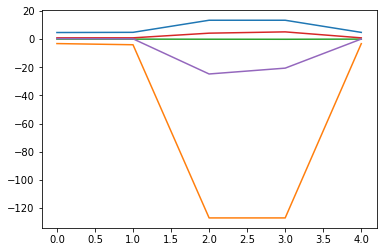

In [146]:
for i in range(5):
    plt.plot(twoperiods_X_train[5,:,i])
plt.show()

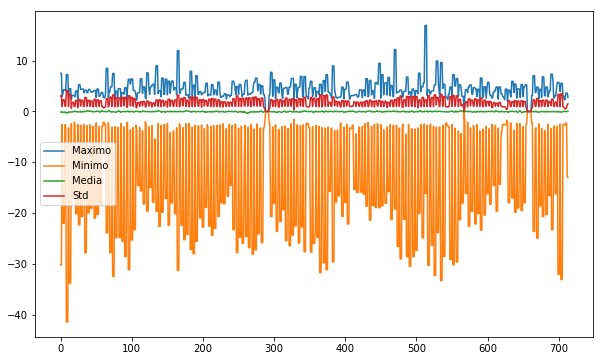

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(new_X_train[0,:,0],label="Maximo")
plt.plot(new_X_train[0,:,1],label="Minimo")
plt.plot(new_X_train[0,:,2],label="Media")
plt.plot(new_X_train[0,:,3],label="Std")
plt.legend()
plt.show()

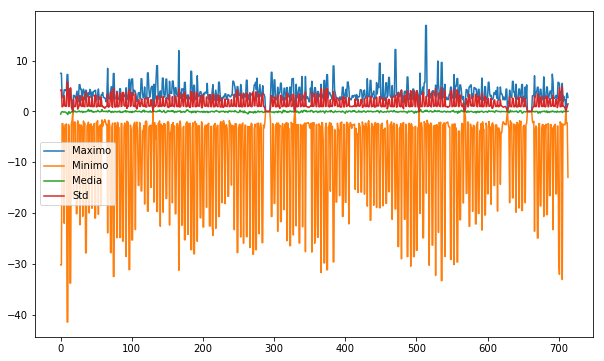

In [7]:
plt.figure(figsize=(10,6))
plt.plot(new_X_train[0,:,0],label="Maximo")
plt.plot(new_X_train[0,:,1],label="Minimo")
plt.plot(new_X_train[0,:,2],label="Media")
plt.plot(new_X_train[0,:,3],label="Std")
plt.legend()
plt.show()

In [52]:
new_X_train.shape

(4044, 714, 4)

In [51]:
to_save = np.reshape(new_X_train,(new_X_train.shape[0],new_X_train.shape[1]*new_X_train.shape[2]))
to_save.shape

(4044, 2856)

## Opcion1: Resample -maxima variacion respecto al cero

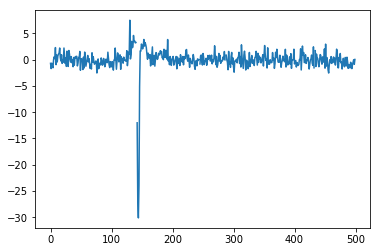

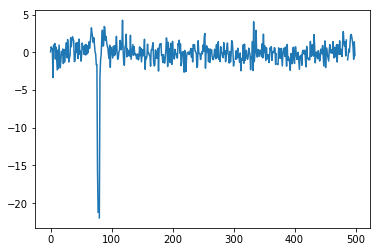

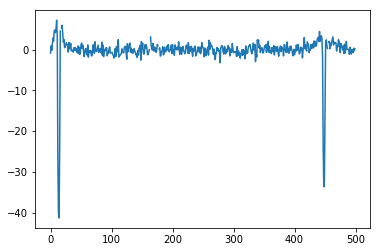

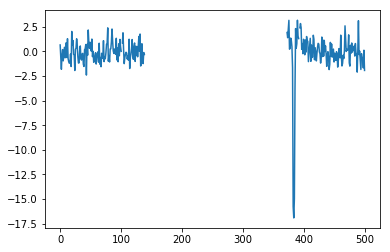

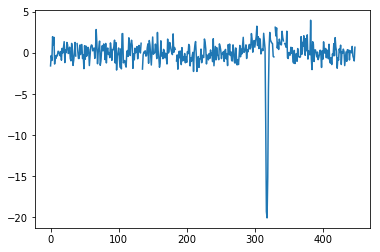

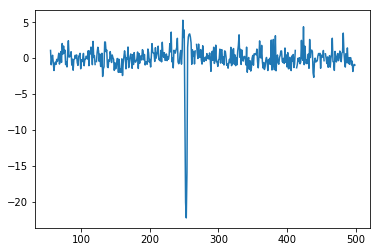

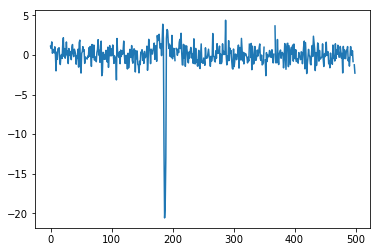

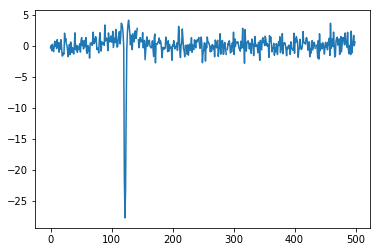

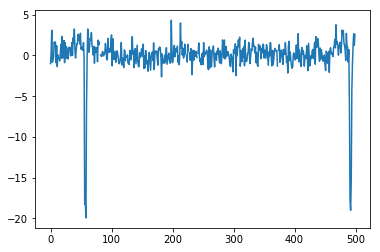

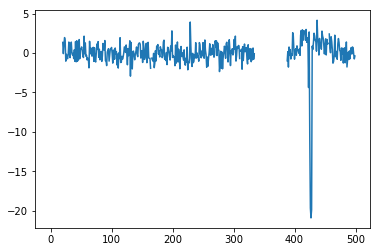

In [3]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.plot(df_train.values[0,500*i:500*(i+1)])
    plt.show()

In [21]:
X_train

4044

In [13]:
stride

0

In [2]:
#TRAINING
X_train = np.nan_to_num(df_train.values)
X_val = np.nan_to_num(df_val.values)
X_test = np.nan_to_num(df_test.values)

window_size = 3
strideg = 3

new_X_train = []
for sequence in X_train:
    new_array = []
    largo = int(len(sequence)/strideg)
    for i in range(largo):
        stride = i*strideg
        window = sequence[stride:stride+window_size]

        #maximo valor alejado del 0
        min_v = np.min(window)
        max_v = np.max(window)
        if np.abs(min_v) > max_v:
            new_array.append(min_v)
        else:
            new_array.append(max_v)
    new_array = np.asarray(new_array)
    new_X_train.append(new_array)
new_X_train = np.asarray(new_X_train)
np.savetxt("koi_light_curves_softresample_train.csv", new_X_train, fmt='%.3f', delimiter=',')

new_X_val = []
for sequence in X_val:
    new_array = []
    largo = int(len(sequence)/strideg)
    for i in range(largo):
        stride = i*strideg
        window = sequence[stride:stride+window_size]

        #maximo valor alejado del 0
        min_v = np.min(window)
        max_v = np.max(window)
        if np.abs(min_v) > max_v:
            new_array.append(min_v)
        else:
            new_array.append(max_v)

    new_array = np.asarray(new_array)
    new_X_val.append(new_array)
new_X_val = np.asarray(new_X_val)
np.savetxt("koi_light_curves_softresample_val.csv", new_X_val, fmt='%.3f', delimiter=',')


new_X_test = []
for sequence in X_test:
    new_array = []
    largo = int(len(sequence)/strideg)
    for i in range(largo):
        stride = i*strideg
        window = sequence[stride:stride+window_size]

        #maximo valor alejado del 0
        min_v = np.min(window)
        max_v = np.max(window)
        if np.abs(min_v) > max_v:
            new_array.append(min_v)
        else:
            new_array.append(max_v)

    new_array = np.asarray(new_array)
    new_X_test.append(new_array)
new_X_test = np.asarray(new_X_test)
np.savetxt("koi_light_curves_softresample_test.csv", new_X_test, fmt='%.3f', delimiter=',')

new_X_test.shape
print("Fin")

Fin


In [59]:
aux1 = pd.read_csv("Resample/koi_light_curves_resample2_train.csv",header=None) #koi_light_curves
aux2 = pd.read_csv("Resample/koi_light_curves_resample2_val.csv",header=None) #koi_light_curves
aux3 = pd.read_csv("Resample/koi_light_curves_resample2_test.csv",header=None) #koi_light_curves

#Ver cuanto dimisnuye porcentaje de nans
nan_values = []
for secuencia in aux1.values:
    nan_values.append(np.sum(secuencia==0))
for secuencia in aux2.values:
    nan_values.append(np.sum(secuencia==0))
for secuencia in aux3.values:
    nan_values.append(np.sum(secuencia==0))      
print("Cantidad de ceros exactos por secuencia",np.mean(nan_values))
print("Porcentaje de ceros excatos por secuencia",np.mean(nan_values)/len(secuencia))

Cantidad de ceros exactos por secuencia 2994.02269458
Porcentaje de ceros excatos por secuencia 0.209592068224


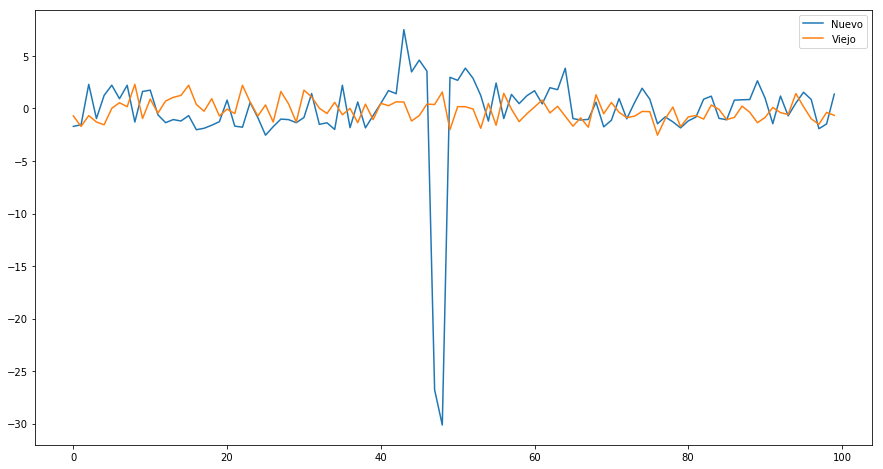

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(new_X_train[0,:100],label="Nuevo")
plt.plot(X_train[0,:100],label="Viejo")
plt.legend()
plt.show()

In [ ]:
#guardar archivo
np.savetxt("prueba.csv", new_X_train, fmt='%.3f', delimiter=',')

In [28]:
interval = []

primer_intervalo = 0
interval.append([0,nans[0][0]-1])
for i in range(len(nans)-1):
    nan1 = nans[i][0]
    nan2 = nans[i+1][0]
    if nan1 == nan2-1: #continuo
        if primer_intervalo == 0:
            primer_intervalo = nan1
        
    elif primer_intervalo!=0:
        interval.append([primer_intervalo+1,nan2-1])
        
        primer_intervalo = 0
    
    else:
        interval.append([nan1+1,nan2-1])

In [29]:
interval

[[0, 140],
 [142, 243],
 [245, 286],
 [288, 432],
 [434, 578],
 [580, 724],
 [726, 801],
 [803, 870],
 [872, 985],
 [987, 1016],
 [1018, 1034],
 [1036, 1162],
 [1164, 1176],
 [1178, 1308],
 [1310, 1454],
 [1456, 1600],
 [1602, 1638],
 [1640, 1891],
 [1893, 2037],
 [2039, 2133],
 [2135, 2183],
 [2185, 2328],
 [2330, 2342],
 [2344, 2447],
 [2449, 2620],
 [2622, 2766],
 [2768, 2912],
 [2914, 2954],
 [2956, 3058],
 [3060, 3204],
 [3206, 3255],
 [3257, 3326],
 [3328, 3350],
 [3352, 3366],
 [3368, 3496],
 [3498, 3642],
 [3644, 3721],
 [3723, 3788],
 [3790, 3934],
 [3936, 4080],
 [4082, 4123],
 [4125, 4221],
 [4223, 4226],
 [4228, 4240],
 [4242, 4372],
 [4374, 4500],
 [4502, 4661],
 [4663, 4664],
 [4666, 4810],
 [4812, 4834],
 [4836, 4955],
 [4957, 5101],
 [5103, 5247],
 [5249, 5326],
 [5328, 5393],
 [5395, 5430],
 [5432, 5539],
 [5541, 5599],
 [5601, 5611],
 [5613, 5685],
 [5687, 5690],
 [5692, 5711],
 [5713, 5831],
 [5833, 5977],
 [5979, 6062],
 [6064, 6123],
 [6125, 6140],
 [6142, 6208],
 

## Opcion2: Recta entre los dos puntos

In [ ]:
coony

## Opcion3: autoencoder feed forward

In [58]:
X_train.shape

(4044, 71427)

In [64]:
import tensorflow as tf
import keras

from keras.models import Sequential,Model,load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Input, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D,UpSampling2D
from keras.utils import np_utils

#Normalizacion
X_train = ( X_train.astype('float32') - np.min(X_train) )/ ( np.max(X_train) - np.min(X_train) )

target_dim = 128 #try other and do a nice plot

input_img = Input(shape=(X_train.shape[1],))
#encoded1 = Dense(500, activation='sigmoid')(input_img)
#encoded2 = Dense(300, activation='sigmoid')(encoded1)

encoded3 = Dense(target_dim, activation='relu')(input_img)

#decoded3 = Dense(300, activation='sigmoid')(encoded3)
#decoded2 = Dense(500, activation='sigmoid')(encoded3)

decoded1 = Dense(X_train.shape[1], activation='sigmoid')(encoded3)
autoencoder = Model(inputs=input_img, outputs=decoded1)
encoder = Model(inputs=input_img, outputs=encoded3)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train,X_train,epochs=40,batch_size=32,shuffle=True,validation_data=(X_val,X_val))

#autoencoder.save('./modelos_entrenados/my_autoencoder_768x1000x500x'+str(d)+'.h5')

#x_autoencoder = encoder.predict(x_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 71427)             0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               9142784   
_________________________________________________________________
dense_42 (Dense)             (None, 71427)             9214083   
Total params: 18,356,867
Trainable params: 18,356,867
Non-trainable params: 0
_________________________________________________________________
Train on 4044 samples, validate on 1074 samples
Epoch 1/40
4044/4044 [==============================] - 40s 10ms/step - loss: 0.6926 - val_loss: 4.2856
Epoch 2/40
4044/4044 [==============================] - 35s 9ms/step - loss: 0.6924 - val_loss: 4.2906
Epoch 3/40
4044/4044 [==============================] - 34s 8ms/step - loss: 0.6924 - val_loss: 4.2907
Epoch 4/40
4044/4044 [==============

KeyboardInterrupt: 

## Opcion4: PySAX
https://github.com/dolaameng/pysax  
https://github.com/dolaameng/tutorials/blob/master/timeseries/TS - SAX Symbolic Aggregate Approximation.ipynb  
https://github.com/johannfaouzi/pyts

In [100]:
def znormalization(ts):
    """
    ts - each column of ts is a time series (np.ndarray)
    """
    mus = ts.mean(axis = 0)
    stds = ts.std(axis = 0)
    return (ts - mus) / stds

def paa_transform(ts, n_pieces):
    """
    ts: the columns of which are time series represented by e.g. np.array
    n_pieces: M equally sized piecies into which the original ts is splitted
    """
    splitted = np.array_split(ts, n_pieces) ## along columns as we want
    return np.asarray(list(map(lambda xs: xs.mean(axis = 0), splitted)))



def sax_transform(ts, n_pieces, alphabet):
    """
    ts: columns of which are time serieses represented by np.array
    n_pieces: number of segments in paa transformation
    alphabet: the letters to be translated to, e.g. "abcd", "ab"
    return np.array of ts's sax transformation
    Steps:
    1. znormalize
    2. ppa
    3. find norm distribution breakpoints by scipy.stats
    4. convert ppa transformation into strings
    """
    from scipy.stats import norm
    alphabet_sz = len(alphabet)
    thrholds = norm.ppf(np.linspace(1./alphabet_sz, 
                                    1-1./alphabet_sz, 
                                    alphabet_sz-1))
    def translate(ts_values):
        return np.asarray([(alphabet[0] if ts_value < thrholds[0]
                else (alphabet[-1] if ts_value > thrholds[-1]
                      else alphabet[np.where(thrholds <= ts_value)[0][-1]+1]))
                           for ts_value in ts_values])
    paa_ts = paa_transform(znormalization(ts), n_pieces)
    return np.apply_along_axis(translate, 0, paa_ts)

In [105]:
aux = np.nan_to_num(df_train.values[-100])


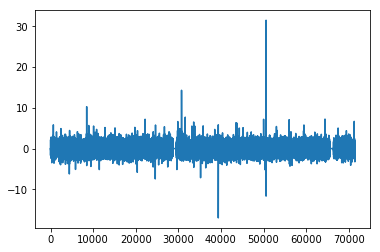

In [106]:
import matplotlib.pyplot as plt
plt.plot(aux)
plt.show()

In [112]:
sax_transform(aux, 200, "abcd")

array(['c', 'b', 'c', 'c', 'b', 'c', 'b', 'b', 'b', 'c', 'c', 'c', 'b',
       'c', 'c', 'b', 'b', 'b', 'c', 'b', 'b', 'c', 'b', 'c', 'c', 'b',
       'b', 'c', 'b', 'c', 'c', 'b', 'c', 'c', 'c', 'c', 'c', 'c', 'b',
       'c', 'c', 'c', 'c', 'b', 'c', 'b', 'c', 'c', 'b', 'c', 'b', 'b',
       'b', 'c', 'b', 'c', 'c', 'b', 'c', 'b', 'c', 'b', 'c', 'b', 'b',
       'b', 'c', 'b', 'c', 'b', 'b', 'c', 'c', 'b', 'b', 'b', 'b', 'c',
       'c', 'c', 'c', 'b', 'b', 'c', 'c', 'b', 'c', 'b', 'b', 'c', 'b',
       'b', 'c', 'c', 'c', 'b', 'c', 'c', 'b', 'b', 'c', 'b', 'c', 'b',
       'b', 'c', 'b', 'c', 'b', 'b', 'b', 'b', 'c', 'b', 'c', 'b', 'b',
       'c', 'b', 'c', 'c', 'b', 'b', 'b', 'c', 'c', 'b', 'c', 'b', 'b',
       'c', 'b', 'c', 'b', 'c', 'b', 'c', 'b', 'c', 'b', 'b', 'b', 'c',
       'b', 'b', 'c', 'c', 'c', 'c', 'b', 'c', 'b', 'b', 'b', 'c', 'b',
       'b', 'c', 'b', 'b', 'b', 'c', 'b', 'b', 'c', 'c', 'b', 'c', 'c',
       'b', 'c', 'c', 'b', 'b', 'c', 'c', 'c', 'c', 'b', 'c', 'b

In [116]:
x_train = np.nan_to_num(df_train.values)
for fila in x_train:
    print(fila.shape)
    print(fila)
    sax_transform(fila, 200, "abcd")

(71427,)
[ -0.707  -1.705  -0.677 ...,   0.766 -12.918   0.359]
(71427,)
[ 0.     0.     0.    ...,  0.205  0.926  1.494]
(71427,)
[-20.26  -10.104  -5.558 ...,  -1.911  -5.595  -3.866]
(71427,)
[-1.182  0.436 -0.489 ...,  2.597  0.8   -0.524]
(71427,)
[ 1.14  -1.064 -0.35  ...,  0.055 -0.489  1.424]
(71427,)
[ 0.     0.     0.    ..., -0.448  0.417  0.053]
(71427,)
[  1.151  -1.728  -0.644 ...,   1.912 -11.254   0.597]
(71427,)
[-0.375 -1.288 -1.072 ..., -0.483  0.031 -0.462]
(71427,)
[ 0.  0.  0. ...,  0.  0.  0.]
(71427,)
[ 0.249  0.456 -0.179 ..., -0.529  1.58  -0.257]
(71427,)
[ 0.289  0.506 -0.149 ..., -0.466  1.368 -0.199]
(71427,)
[ 0.225  0.411 -0.119 ..., -0.538  1.822 -0.275]
(71427,)
[-0.301 -0.777  0.972 ..., -1.321 -0.601 -0.976]
(71427,)
[ 0.934 -0.856 -0.483 ...,  0.161  0.113  0.19 ]
(71427,)
[-1.447  1.829 -0.438 ...,  0.861  0.    -4.454]
(71427,)
[ 0.502  0.374  0.628 ..., -0.42   0.672 -0.446]
(71427,)
[ 0.509  0.394  0.617 ..., -0.419  0.604 -0.434]
(71427,)
[ 0. 

/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/etc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in less_equal


IndexError: index -1 is out of bounds for axis 0 with size 0

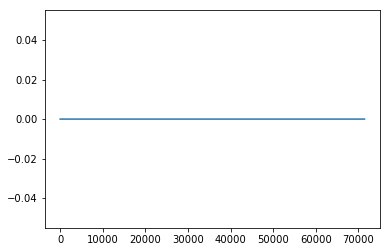

In [120]:
plt.plot(fila)
plt.show()

In [124]:
train_indexs = []
x_train = np.nan_to_num(df_train.values)
cantidad_train = 0
for i,fila in enumerate(x_train):
    if np.max(fila) == 0 and np.min(fila) == 0:
        cantidad_train+=1
        train_indexs.append(i)
        
print("Cantidad de secuencias nan en train: ",cantidad_train)

val_indexs = []
x_val = np.nan_to_num(df_val.values)
cantidad_val = 0
for i,fila in enumerate(x_val):
    if np.max(fila) == 0 and np.min(fila) == 0:
        cantidad_val+=1
        val_indexs.append(i)
print("Cantidad de secuencias nan en val: ",cantidad_val)
      
test_indexs = []
x_test = np.nan_to_num(df_test.values)
cantidad_test = 0
for i,fila in enumerate(x_test):
    if np.max(fila) == 0 and np.min(fila) == 0:
        cantidad_test+=1
        test_indexs.append(i)
print("Cantidad de secuencias nan en test: ",cantidad_test)

Cantidad de secuencias nan en train:  188
Cantidad de secuencias nan en val:  44
Cantidad de secuencias nan en test:  52


In [134]:
','.join(map(str,train_indexs))

'29,30,37,39,51,66,89,92,123,146,154,217,223,344,360,383,395,459,461,496,509,539,559,570,579,622,623,633,635,637,660,661,663,672,680,686,706,748,774,840,854,874,876,953,960,982,1020,1045,1178,1207,1222,1263,1277,1322,1344,1370,1383,1393,1408,1419,1433,1435,1454,1456,1468,1471,1529,1539,1548,1581,1583,1588,1602,1648,1702,1712,1719,1721,1754,1767,1770,1788,1816,1899,1926,1938,1943,1963,1984,2010,2032,2034,2108,2111,2125,2163,2200,2206,2217,2241,2242,2257,2265,2267,2269,2278,2281,2290,2292,2303,2336,2351,2357,2358,2359,2364,2402,2413,2417,2422,2476,2592,2595,2596,2605,2618,2630,2653,2660,2662,2668,2692,2704,2716,2754,2759,2773,2785,2822,2836,2860,2884,2889,2934,2951,2965,2966,2997,3001,3055,3071,3133,3202,3208,3213,3270,3273,3284,3309,3311,3319,3336,3383,3443,3450,3460,3473,3478,3522,3540,3588,3594,3649,3652,3656,3704,3746,3821,3911,3913,3915,3947,3969,3975,3999,4003,4012,4019'

In [135]:

file = open('falsos.txt','w')
file.write(','.join(map(str,train_indexs)))
file.write('\n')
file.write(','.join(map(str,val_indexs)))
file.write('\n')
file.write(','.join(map(str,test_indexs)))
file.write('\n')
file.close()

In [162]:
df_labels_train = pd.read_csv('Datos_split/koi_labels_train.csv')
df_labels_val = pd.read_csv('Datos_split/koi_labels_val.csv')
df_labels_test = pd.read_csv('Datos_split/koi_labels_test.csv')
df_labels_train.head()

,NExScI Disposition,KOI Name,Kepler Name,Planet Radius,Stellar Radius,Metallicity,Stellar Mass
0,CONFIRMED,K00889.01,Kepler-75 b,10.51,0.843,-0.08,0.821
1,FALSE POSITIVE,K01009.01,NaN,1.17,0.751,-0.20,0.727
2,FALSE POSITIVE,K07621.01,NaN,1.86,1.187,-0.12,0.864
3,FALSE POSITIVE,K04162.01,NaN,9.19,5.302,-0.10,2.050
4,FALSE POSITIVE,K07622.01,NaN,1.50,0.620,-0.20,0.607


#### ERROR ENCONTRADO Y Corregido

In [170]:
print("Dimensiones antes:",df_train.shape)
mask = np.ones(len(df_train),dtype=bool)
mask[train_indexs] = False
df_train_true = df_train[mask]
df_labels_train_true = df_labels_train[mask]
print("Dimensiones despues:",df_train_true.shape)
#save
df_train_true.to_csv('koi_light_curves_true_train.csv',index=False,header=None)
df_labels_train_true.to_csv('koi_labels_true_train.csv',index=False)

#df_val
mask = np.ones(len(df_val),dtype=bool)
mask[val_indexs] = False
df_val_true = df_val[mask]
df_labels_val_true = df_labels_val[mask]
#save
df_val_true.to_csv('koi_light_curves_true_val.csv',index=False,header=None)
df_labels_val_true.to_csv('koi_labels_true_val.csv',index=False)

#df_test
mask = np.ones(len(df_test),dtype=bool)
mask[test_indexs] = False
df_test_true = df_test[mask]
df_labels_test_true = df_labels_test[mask]
#save
df_test_true.to_csv('koi_light_curves_true_test.csv',index=False,header=None)
df_labels_test_true.to_csv('koi_labels_true_test.csv',index=False)
print("Termino")

Termino


## WAVELETS

In [137]:
from scipy import signal


In [155]:
final_array =[]
for seq in x_train:
    wavelet_f = signal.cwt(seq, signal.ricker, np.arange(1,500))

    new_array = []
    for i in range(wavelet_f.shape[0]):
        new_array.append( signal.resample(wavelet_f[i],500) )
    new_array = np.asarray(new_array)
    
    final_array.append(new_array)
final_array = np.asarray(final_array)  

#para guardar el csv es transformarlo asi
#to_save = np.reshape(final_array,(final_array.shape[0],final_array.shape[1]*final_array.shape[2]))
final_array.shape

KeyboardInterrupt: 

In [157]:
len(final_array)

277

/etc/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


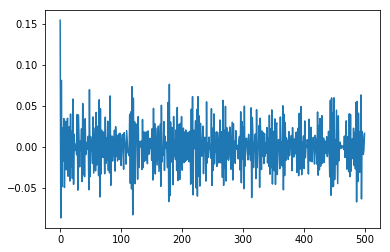

In [154]:
wavelet_f = signal.cwt(x_train[0], signal.ricker, np.arange(1,500))

#plt.plot(x_train[0],label="Original")
#plt.plot(wavelet_f[12],label="Wavelet")
plt.plot( signal.resample(wavelet_f[12],500))
plt.legend()
plt.show()

In [ ]:
#normalizar...
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(Xsample_train.astype('float'))

Xstd_train = std.transform(Xsample_train)

In [ ]:
#fijo para todos los datos
df_labels_train = pd.read_csv('Datos_split/koi_labels_train.csv')

y_train = ((df_labels_train["NExScI Disposition"]=="CONFIRMED")*1).values

In [ ]:
from keras.models import Sequential,Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

model = Sequential()
model.add(Conv2D( 64, (3, 3) , padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D( 64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

In [ ]:
model.compile( optimizer='rmsprop', loss='binary_crossentropy' ,metrics=['acc'])
model.fit(x_train, y_train,batch_size=100,epochs=25)